# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import yfinance as yf

# Baixando os dados históricos de uma ação brasileira (exemplo: Petrobras PETR3)
ticker = 'PETR3.SA'
petro = yf.Ticker(ticker)
#print(petro)
# Pegar todos os dados históricos
print(petro.history(start='2023-11-01', end='2024-11-12'))
#data = yf.download(ticker, start='2024-11-01', end='2024-11-12')

# Visualizando as primeiras linhas dos dados
#print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2023-11-01 00:00:00-03:00  32.501366  33.134452  32.424369  32.749466   
2023-11-03 00:00:00-03:00  33.356889  33.356889  32.552694  33.023232   
2023-11-06 00:00:00-03:00  33.288444  33.510879  32.877793  32.937679   
2023-11-07 00:00:00-03:00  32.501362  32.835016  31.936716  32.210484   
2023-11-08 00:00:00-03:00  32.030825  32.065047  31.209522  31.449068   
...                              ...        ...        ...        ...   
2024-11-05 00:00:00-03:00  38.349998  38.459999  37.740002  38.150002   
2024-11-06 00:00:00-03:00  37.830002  38.240002  37.619999  38.110001   
2024-11-07 00:00:00-03:00  38.009998  38.820000  38.000000  38.380001   
2024-11-08 00:00:00-03:00  38.500000  39.330002  38.459999  39.080002   
2024-11-11 00:00:00-03:00  38.799999  39.279999  38.599998  39.139999   

                             Volume  Dividends  St

In [41]:
from datetime import datetime, timedelta

last_week_date = datetime.now() - timedelta(weeks=1)
dataset_train = yf.download('ITUB4.SA ITSA4.SA', start='2024-01-01', end=last_week_date.strftime('%Y-%m-%d'))
dataset_train

[*********************100%***********************]  2 of 2 completed


Price                      Adj Close               Close                High  \
Ticker                      ITSA4.SA   ITUB4.SA ITSA4.SA   ITUB4.SA ITSA4.SA   
Date                                                                           
2024-01-02 00:00:00+00:00   9.617081  31.571276    10.17  33.520000    10.32   
2024-01-03 00:00:00+00:00   9.598168  31.222792    10.15  33.150002    10.25   
2024-01-04 00:00:00+00:00   9.475236  31.015581    10.02  32.930000    10.18   
2024-01-05 00:00:00+00:00   9.673819  31.740820    10.23  33.700001    10.29   
2024-01-08 00:00:00+00:00   9.607624  31.401749    10.16  33.340000    10.25   
...                              ...        ...      ...        ...      ...   
2024-11-01 00:00:00+00:00  10.510000  34.810001    10.51  34.810001    10.64   
2024-11-04 00:00:00+00:00  10.670000  35.279999    10.67  35.279999    10.74   
2024-11-05 00:00:00+00:00  11.060000  36.340000    11.06  36.340000    11.10   
2024-11-06 00:00:00+00:00  11.040000  36.169998    11.04  36.169998    11.07   
2024-11-07 00:00:00+00:00  10.890000  35.639999    10.89  35.639999    11.11   

Price                                     Low                Open             \
Ticker                      ITUB4.SA ITSA4.SA   ITUB4.SA ITSA4.SA   ITUB4.SA   
Date                                                                           
2024-01-02 00:00:00+00:00  33.889999    10.13  33.240002    10.31  33.889999   
2024-01-03 00:00:00+00:00  33.770000    10.12  33.150002    10.15  33.509998   
2024-01-04 00:00:00+00:00  33.230000     9.96  32.700001    10.15  33.150002   
2024-01-05 00:00:00+00:00  33.700001    10.00  32.880001    10.02  32.910000   
2024-01-08 00:00:00+00:00  33.669998    10.13  33.290001    10.23  33.520000   
...                              ...      ...        ...      ...        ...   
2024-11-01 00:00:00+00:00  35.299999    10.48  34.790001    10.63  35.000000   
2024-11-04 00:00:00+00:00  35.540001    10.56  34.889999    10.60  35.130001   
2024-11-05 00:00:00+00:00  36.650002    10.71  35.599998    10.74  35.700001   
2024-11-06 00:00:00+00:00  36.430000    10.83  35.520000    10.93  35.869999   
2024-11-07 00:00:00+00:00  36.480000    10.80  35.560001    10.97  36.130001   

Price                        Volume            
Ticker                     ITSA4.SA  ITUB4.SA  
Date                                           
2024-01-02 00:00:00+00:00  16813400  18948200  
2024-01-03 00:00:00+00:00  18182000  18530900  
2024-01-04 00:00:00+00:00  25078600  26585200  
2024-01-05 00:00:00+00:00  27054600  27726400  
2024-01-08 00:00:00+00:00  15826100  11810700  
...                             ...       ...  
2024-11-01 00:00:00+00:00  17743500  22751600  
2024-11-04 00:00:00+00:00  21237800  20499900  
2024-11-05 00:00:00+00:00  31460900  52524800  
2024-11-06 00:00:00+00:00  21420700  38887000  
2024-11-07 00:00:00+00:00  24367600  14842300  

[218 rows x 12 columns]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [9]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [10]:
#dataset_train = pd.read_csv('Data/Google_Stock_Price_Train.csv')
training_set = data['Close'].values.reshape(-1, 1)

### Feature Scaling

In [6]:
training_set

array([[125.06999969],
       [126.36000061],
       [125.01999664],
       [129.61999512],
       [130.1499939 ],
       [130.72999573],
       [133.49000549],
       [133.41000366],
       [134.75999451],
       [135.94000244],
       [135.21000671],
       [135.27000427],
       [137.86999512],
       [141.11000061],
       [142.52999878],
       [141.86000061],
       [143.96000671],
       [145.92999268],
       [143.        ],
       [144.28999329],
       [145.42999268],
       [150.82000732],
       [154.5       ],
       [151.72999573],
       [154.6499939 ],
       [151.91999817],
       [150.86999512],
       [151.00999451],
       [153.8500061 ],
       [153.19999695],
       [155.33000183],
       [153.71000671],
       [152.55000305],
       [148.47999573],
       [148.91000366],
       [149.3999939 ],
       [146.71000671],
       [147.91999817],
       [147.41000366],
       [145.30999756],
       [145.91000366],
       [151.02999878],
       [153.83000183],
       [151

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [12]:
len(training_set_scaled)

1006

In [13]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input

### Initialising the RNN

In [22]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [23]:
# Define the input layer
regressor.add(Input(shape=(X_train.shape[1], 1)))

# Add the LSTM layer and Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [27]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [29]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1294
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0073
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0070
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0057
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0067
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0058
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0070
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0070
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [30]:
start_date2 = '2024-01-01'
end_date2 = '2024-01-31'
data2 = yf.download(stock_symbol, start=start_date2, end=end_date2)

[*********************100%***********************]  1 of 1 completed


In [31]:
#dataset_test = pd.read_csv('Data/Google_Stock_Price_Test.csv')
real_stock_price = data2['Close'].values.reshape(-1, 1)

### Getting the predicted stock price of 2017

In [24]:
#regressor.save('rnn.keras')

In [34]:
dataset_total = pd.concat([pd.DataFrame(data['Close'].values.reshape(-1, 1)), pd.DataFrame(data2['Close'].values.reshape(-1, 1))], axis=0)
inputs = dataset_total[len(dataset_total) - len(data2['Close'].values.reshape(-1, 1)) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


### Visualising the results

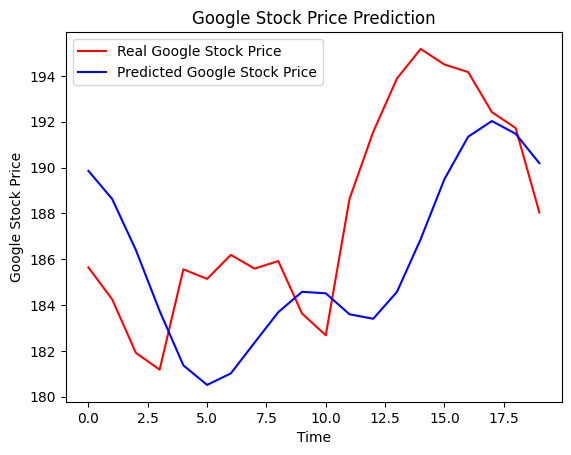

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Supondo que `real_stock_price` e `predicted_stock_price` já estejam definidos
# e são arrays numpy com os valores reais e previstos

# Calculando MAE
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

# Calculando RMSE
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

# Calculando MAPE
mape = mean_absolute_percentage_error(real_stock_price, predicted_stock_price)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 3.965781402587891
RMSE: 4.661703483893687
MAPE: 0.021009705632771904
